In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data
customer_df = pd.read_csv('customerTargeting.csv')
customer_df.head()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,...,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,...,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,...,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,...,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,...,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


In [3]:
#get insight into data
# customer_df = customer_df.drop(['Email', 'Address', 'Avatar'], axis=1)
print(customer_df.shape)
customer_df.describe()

(6620, 71)


,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,...,6620.000000,6620.000000,6620.000000,6620.000000,6620.00000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000
mean,2.708779,14.424018,10.485650,24.909668,10.988066,13.412085,10.161027,10.745468,14.169033,3.251057,...,-0.029311,-0.006724,-0.004147,0.008827,0.00000,-0.228426,-0.103728,0.000408,1.917134,1.031722
std,1.857725,10.700787,8.384203,18.174948,5.635985,10.090030,7.495039,7.964247,9.866734,8.481210,...,1.220752,1.068199,0.663238,0.683422,0.32287,3.390902,1.944419,0.092761,0.302175,0.731042
min,1.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,...,-4.684111,-4.319826,-2.512919,-3.118836,-2.00000,-15.202740,-9.181722,-0.750000,0.000000,0.000000
25%,1.667000,6.000000,4.000000,10.000000,6.000000,5.000000,4.000000,4.000000,6.000000,-2.000000,...,-0.716407,-0.531224,-0.440407,-0.406811,0.00000,-2.222226,-1.293471,-0.054331,1.710000,0.000000
50%,2.150000,13.000000,9.000000,22.000000,11.000000,12.000000,9.000000,9.000000,13.000000,1.000000,...,0.000000,0.000000,0.000000,0.001070,0.00000,-0.119378,-0.012487,0.000000,1.850000,1.000000
75%,2.800000,21.000000,15.000000,36.000000,16.000000,20.000000,15.000000,16.000000,21.000000,7.000000,...,0.654627,0.490504,0.410915,0.450104,0.00000,1.809334,1.035235,0.054825,2.020000,2.000000
max,23.000000,52.000000,47.000000,94.000000,20.000000,61.000000,43.000000,48.000000,52.000000,48.000000,...,4.821136,4.396281,2.987136,2.830550,2.00000,12.562698,8.209578,0.666667,4.330000,2.000000


<p><strong>Our task</strong> is to try to predict which of the 2 groups (if any) will turn out to be more profitable by build a classifier using PCA and Logistic Regression</p>

<h2>Implementing PCA to find important components</h2>

In [4]:
#standardization is crucial for PCA
from sklearn.preprocessing import StandardScaler

target = customer_df['target']
quant_df = customer_df[customer_df.columns.difference(['target'])]

quant_scaled = StandardScaler().fit_transform(quant_df)
customer_df_scaled = pd.DataFrame(quant_scaled, columns=quant_df.columns)

customer_df_scaled['target'] = customer_df['target']
customer_df_scaled.describe()

,c_1,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,...,g2_20,g2_21,g2_3,g2_4,g2_5,g2_6,g2_7,g2_8,g2_9,target
count,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,...,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6.620000e+03,6620.000000
mean,2.515842e-16,5.456193e-16,1.382244e-16,7.623979e-17,3.255201e-17,-9.089741e-17,2.247279e-18,8.452453e-18,7.586349e-17,2.169798e-16,...,-6.798858e-17,1.608817e-16,-4.304378e-16,-1.442284e-18,6.619411e-17,3.270294e-17,-2.683318e-18,-4.655558e-17,2.493641e-16,1.031722
std,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,...,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,0.731042
min,-8.322992e+00,-3.813925e+00,-4.659689e+00,-4.338546e+00,-4.408148e+00,-4.532422e+00,-4.432116e+00,-5.408025e+00,-3.737032e+00,-5.177800e+00,...,-3.225921e+00,-1.280201e+00,-1.214229e+00,-1.381718e+00,-1.769171e+00,-1.375906e+00,-1.406017e+00,-1.309268e+00,-1.388694e+00,0.000000
25%,-6.599057e-01,-5.184935e-01,-4.807686e-01,-4.683732e-01,-5.239197e-01,-4.558972e-01,-4.905838e-01,-4.216081e-01,-6.158700e-01,-4.755891e-01,...,-7.261260e-01,-5.940647e-01,-8.506360e-01,-7.769670e-01,-8.867983e-01,-7.879388e-01,-8.771329e-01,-7.984995e-01,-8.743799e-01,0.000000
50%,4.474591e-02,-1.654116e-01,1.790610e-01,1.539843e-02,1.183599e-02,1.447105e-02,-1.759995e-02,-1.730405e-02,-2.051907e-01,2.181797e-01,...,2.460225e-01,-3.653526e-01,-2.446473e-01,-1.722155e-01,-4.425194e-03,-1.019766e-01,-8.380657e-02,-1.600394e-01,-1.543407e-01,1.000000
75%,6.613161e-01,5.407522e-01,6.189474e-01,4.300598e-01,4.136528e-01,4.848393e-01,4.553839e-01,5.217680e-01,5.340319e-01,6.036068e-01,...,7.527984e-01,9.207146e-02,6.037368e-01,5.974682e-01,8.779479e-01,5.839857e-01,7.095197e-01,6.061127e-01,6.685612e-01,2.000000
max,4.492859e+00,4.306959e+00,4.138038e+00,5.129555e+00,5.101515e+00,3.620628e+00,5.342884e+00,4.834345e+00,5.626454e+00,3.764109e+00,...,3.958816e+00,1.381479e+01,4.482064e+00,3.951090e+00,1.583846e+00,4.601764e+00,4.279488e+00,4.436873e+00,3.754443e+00,2.000000


In [5]:
customer_df_scaled.head()

,c_1,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,...,g2_20,g2_21,g2_3,g2_4,g2_5,g2_6,g2_7,g2_8,g2_9,target
0,0.353031,-0.400800,0.179061,-0.122822,0.011836,0.171260,0.613045,0.252232,-0.451598,0.064009,...,0.985403,-0.365353,-1.214229,-1.051854,-0.710324,-0.983928,-1.406017,-1.309268,-1.285831,2
1,-0.175458,0.658446,-0.810683,-0.122822,0.011836,1.895944,0.297723,-0.421608,-0.205191,-0.475589,...,0.358894,-0.594065,0.482539,1.257197,-0.180900,1.073959,0.709520,0.733805,1.080012,1
2,-0.836069,-1.813127,-0.260825,-1.228586,0.949408,-0.769476,-0.175261,-0.421608,-2.012179,-0.861016,...,0.854891,1.006920,0.967330,0.212626,-1.592697,-0.101977,-1.009354,0.733805,-1.285831,2
3,0.397072,0.069976,0.508976,0.360950,-1.327553,0.014471,-0.490584,0.521768,0.123353,0.603607,...,-1.258126,-0.273868,-0.850636,-0.941899,1.054423,-0.885933,-0.216028,-0.415423,0.257110,0
4,-0.395661,-0.518493,-0.920655,-0.883035,1.351225,0.641629,-0.648245,-0.556376,0.287624,-0.861016,...,-0.728738,-0.456837,1.573319,1.477107,-0.533849,1.661926,1.502846,1.372265,0.977149,2


In [6]:
#carrying out PCA
from sklearn.decomposition import PCA

quant_df = customer_df_scaled[customer_df_scaled.columns.difference(['target'])]
pca = PCA().fit(quant_df)
quant_df_pca = pca.transform(quant_df)

print(quant_df_pca.shape)

(6620, 70)


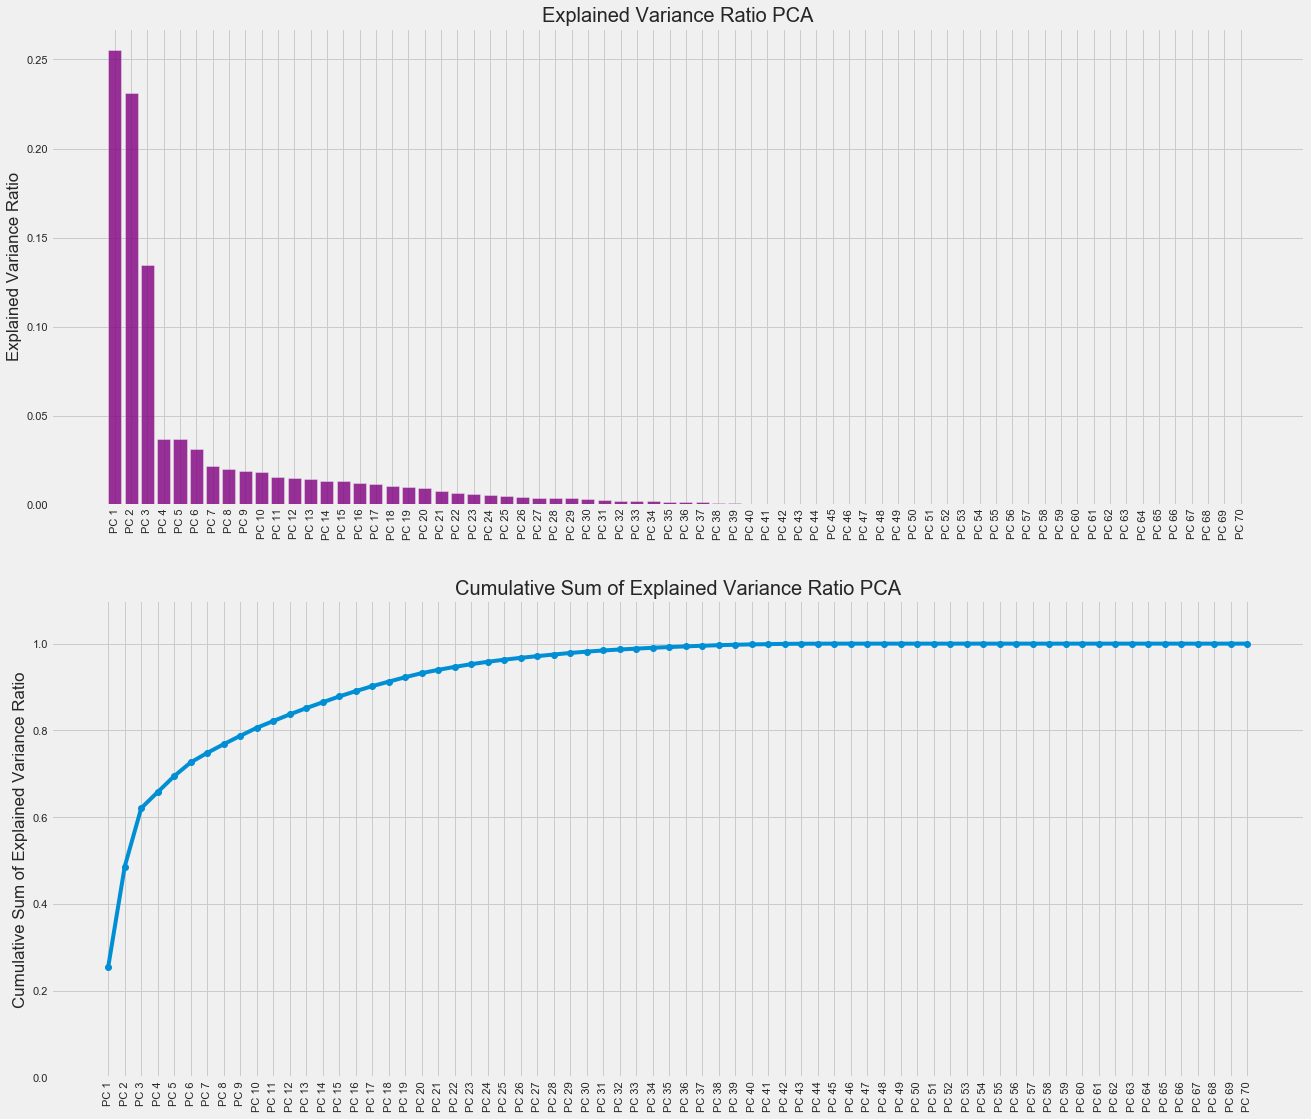

In [7]:
#plot explained variance ratio each principal component
fig, ax = plt.subplots(nrows=2, figsize=(20,18))
ax1, ax2 = ax.ravel()

ratio = pca.explained_variance_ratio_
ax1.bar(range(len(ratio)), ratio, color='purple', alpha=0.8)
ax1.set_title('Explained Variance Ratio PCA', fontsize=20)
ax1.set_xticks(range(len(ratio)))
ax1.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))], rotation='vertical')
ax1.set_ylabel('Explained Variance Ratio')

ratio = pca.explained_variance_ratio_
ax2.plot(np.cumsum(ratio), 'o-')
ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)
ax2.set_ylim(0,1.1)
ax2.set_xticks(range(len(ratio)))
ax2.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))], rotation='vertical')
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

<p>We can see that approximately 95% of the data can be explained by 25 principal components (almost a third of the full dataset). So, we will use those 25 components in our model</p>

<h2>Building our model</h2>

In [8]:
#split the data
from sklearn.model_selection import train_test_split

x_data = customer_df.drop(['target'], axis=1)
y_data = customer_df['target']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5296, 70)
(1324, 70)
(5296,)
(1324,)


In [9]:
y_data.value_counts()

1    3076
2    1877
0    1667
Name: target, dtype: int64

In [10]:
num_components = 25

#scale the datasets
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#reduce dimensions
pca = PCA(num_components).fit(x_train_scaled)
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

print(x_train_pca.shape)

(5296, 25)


In [11]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

logreg_lasso = LogisticRegressionCV(solver='liblinear', multi_class='ovr', penalty='l1', max_iter=100000, cv=10)
logreg_lasso.fit(x_train_pca, y_train)

y_train_pred = logreg_lasso.predict(x_train_pca)
y_test_pred = logreg_lasso.predict(x_test_pca)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print('Train accuracy:', train_score*100)
print('Test accuracy:', test_score*100)

Train accuracy: 52.15256797583081
Test accuracy: 52.64350453172205


<p>Hmm, this model seems not so good since it's accuracy is only 50%. We will try to use KNN classifier algorithm</p>

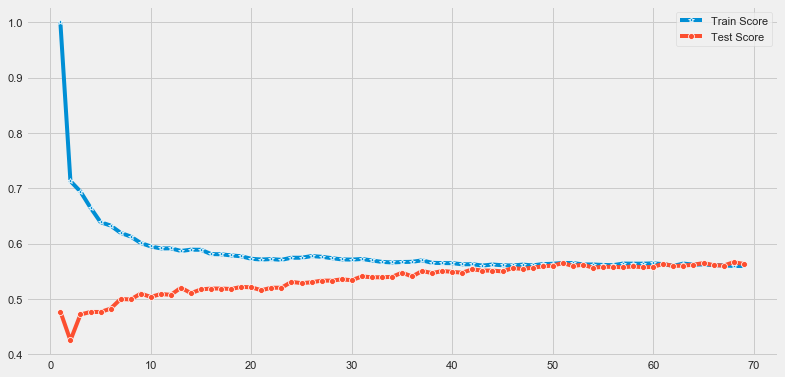

In [13]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1, 70):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train_pca, y_train)
    
    train_scores.append(knn.score(x_train_pca, y_train))
    test_scores.append(knn.score(x_test_pca, y_test))
    
plt.figure(figsize=(12, 6))
p = sns.lineplot(range(1, 70), train_scores, marker='*', label='Train Score')
p = sns.lineplot(range(1, 70), test_scores, marker='o', label='Test Score')

<p>It seems that the best result is captured at k=51 yet the score isn't satisfying</p>

In [14]:
knn = KNeighborsClassifier(51)

knn.fit(x_train_pca, y_train)
knn.score(x_test_pca, y_test)

0.5649546827794562

<p>We only got 56% of accuracy score, so we need to try to use another classification/clustering algorithms</p>